# **Tarea 2**
**Valeria Ferreira Nocua**


Support each piece of code with a thorough explanation of its methods, techniques, functions, and tricks. Reference your search source(papers, books, tutorials, websites, etc.). Add any necessary bibliographical references or links. 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
#clase punto que es para un vértice, tiene x, y, y su nombre
class Point:
  #constructor
  def __init__(self, x, y, name):
    self.x = x
    self.y = y
    self.name = name
    self.type = None
  #metodos de la clase
  def __repr__(self):
    return(f"({self.x}, {self.y})")

  def __str__(self):
    return(f"({self.x}, {self.y})")

In [40]:
#graficar poligonooos
def polygon(points):
  xcoor = []
  ycoor = []
  for i in points:
    plt.scatter(i.x, i.y, marker = 'o', color = 'darkviolet')
    xcoor.append(i.x)
    ycoor.append(i.y)
    plt.annotate(i.name, xy=[i.x, i.y])
  xcoor.append(points[0].x)
  ycoor.append(points[0].y)
  plt.plot(xcoor, ycoor,color = 'hotpink')
  
  
  plt.show()



In [41]:
def toPoint(P):
  #pasa una lista de puntos a una lista de elementos de la clase puntos
  points = []
  for i in range(len(P)):
    points.append(Point(P[i][0], P[i][1], 'p' + str(i+1)))
  
  return points

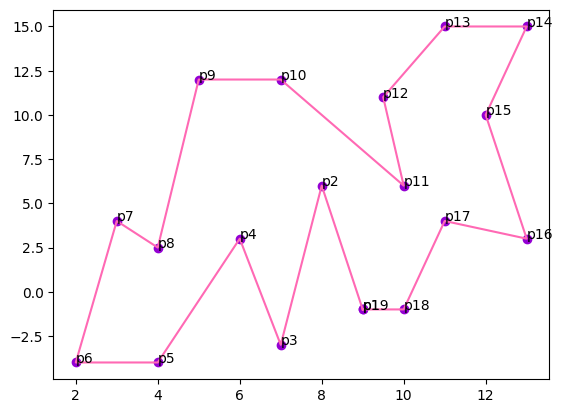

In [42]:
p = [(9.0,-1.0), (8.0,6.0), (7.0,-3.0), (6.0,3.0), (4.0,-4.0), (2.0,-4.0),
          (3.0,4.0), (4.0,2.5), (5.0,12.0), (7.0,12.0), (10.0,6.0), (9.5,11.0),
          (11.0,15.0), (13.0,15.0), (12.0,10.0), (13.0,3.0), (11.0,4.0), 
          (10.0,-1.0), (9.0,-1.0)]



points = toPoint(p)


polygon(points)


1. Write down a code able to identify if the points are ordered in a counterclockwise order. The code should inverse the order of points so that they are counterclockwise ordered if they are in the opposite order. **Explain and implement your procedure**.

In [43]:
def crossProd(p0, p1, p2): #origen comun, p1 , p2
  return((p1.x - p0.x)*(p2.y- p0.y)- (p2.x - p0.x)*(p1.y-p0.y))

In [44]:
def checkorder(points):
    
    cross_sum = 0
    n = len(points)
    for i in range(n):
        cross = crossProd(points[i], points[(i+1)%n], points[(i+2)%n])
        cross_sum += cross
    
    if cross_sum > 0:
        print('the points are in a counterclockwise order')
        
        return points
    else:
        print('the points are in a clockwise order, changing the order ....')
        return points.reverse()

In [45]:
checkorder(points)

the points are in a clockwise order, changing the order ....


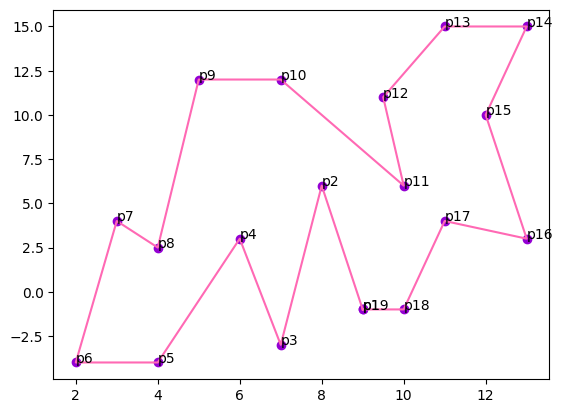